MNIST DATASET PREDICTION USING GENERAL ADVERSARIAL NETWORKS(GAN)

The MNIST dataset is a large collection of handwritten digits, consisting of 70,000 images of size 28x28 pixels. 

The dataset is divided into a training set of 60,000 examples and a test set of 10,000 examples. 

Each image is a grayscale representation of a handwritten digit, with pixel values ranging from 0 (black) to 1 (white).

Key Features

**Training Set**: 60,000 images of handwritten digits (0-9)

**Test Set**: 10,000 images of handwritten digits (0-9)

**Image Size**: 28x28 pixels

**Pixel Values**: Grayscale, ranging from 0 (black) to 1 (white)

**Target Data**: One-hot binary vectors of size 10, corresponding to the digit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5 
x_train = np.expand_dims(x_train, axis=-1) 

x_test = (x_test.astype(np.float32) - 127.5) / 127.5 
x_test = np.expand_dims(x_test, axis=-1) 


BUILDING GENERATOR

In [2]:
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model


BUILDING DISCRIMINATOR

In [3]:
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model


CREATING AND COMPILING THE MODEL

In [4]:
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
generator = build_generator()

z = tf.keras.Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


FUNCTIONS TO PERFORM VISUALIZATION OF REAL AND PREDICTED AND EPOCH WISE VISUALISATION

In [5]:
def sample_images(generator, epoch, image_grid_rows=4, image_grid_columns=4):
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, 100))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(image_grid_rows, image_grid_columns, figsize=(4, 4), sharey=True, sharex=True)
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

def visualize_real_vs_generated_data(x_test, generator, num_images=8):
    z = np.random.normal(0, 1, (num_images, 100))
    gen_imgs = generator.predict(z)
    gen_imgs = 0.5 * gen_imgs + 0.5 
    real_imgs = 0.5 * x_test[:num_images] + 0.5

    fig, axs = plt.subplots(2, num_images, figsize=(2 * num_images, 4))
    for i in range(num_images):
        axs[0, i].imshow(real_imgs[i, :, :, 0], cmap='gray')
        axs[0, i].axis('off')
        axs[0, i].set_title("Real")
        axs[1, i].imshow(gen_imgs[i, :, :, 0], cmap='gray')
        axs[1, i].axis('off')
        axs[1, i].set_title("Generated")
    plt.show()


TRAINING GENERATOR AND DISCRIMINATOR

1/1 [==============================] - 0s 20ms/step
1/10 [D loss: 0.6546, acc.: 60.94%] [G loss: 0.7642]
1/1 [==============================] - 0s 90ms/step


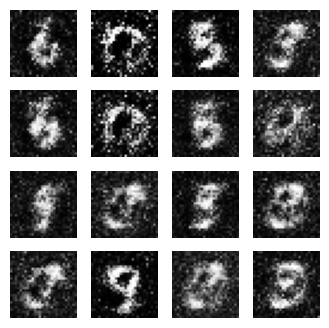

1/1 [==============================] - 0s 25ms/step
2/10 [D loss: 0.5704, acc.: 76.56%] [G loss: 0.9988]
1/1 [==============================] - 0s 26ms/step


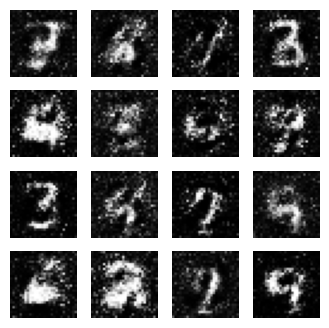

1/1 [==============================] - 0s 20ms/step
3/10 [D loss: 0.5913, acc.: 71.88%] [G loss: 0.9677]
1/1 [==============================] - 0s 21ms/step


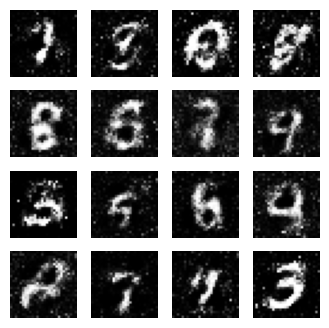

1/1 [==============================] - 0s 20ms/step
4/10 [D loss: 0.6636, acc.: 59.38%] [G loss: 0.8929]
1/1 [==============================] - 0s 20ms/step


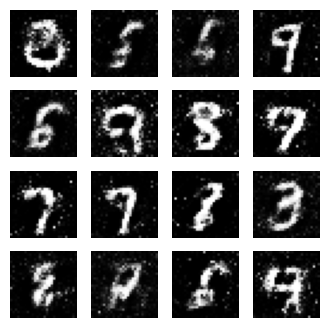

1/1 [==============================] - 0s 24ms/step
5/10 [D loss: 0.6370, acc.: 59.38%] [G loss: 0.9484]
1/1 [==============================] - 0s 22ms/step


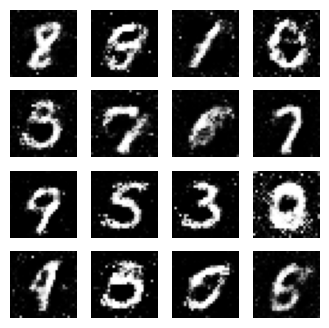

1/1 [==============================] - 0s 21ms/step
6/10 [D loss: 0.7128, acc.: 51.56%] [G loss: 0.8542]
1/1 [==============================] - 0s 22ms/step


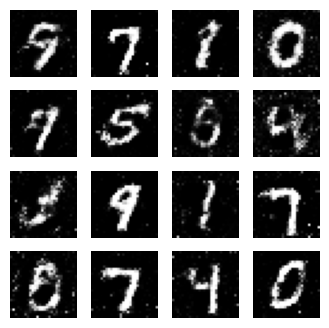

1/1 [==============================] - 0s 25ms/step
7/10 [D loss: 0.6826, acc.: 60.94%] [G loss: 0.8056]
1/1 [==============================] - 0s 24ms/step


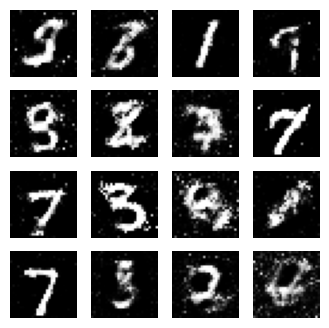

1/1 [==============================] - 0s 25ms/step
8/10 [D loss: 0.6840, acc.: 53.12%] [G loss: 0.8480]
1/1 [==============================] - 0s 25ms/step


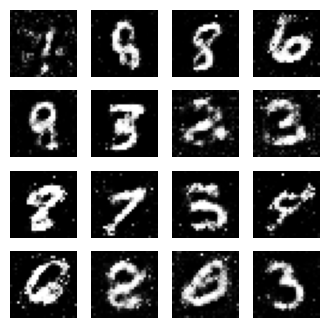

1/1 [==============================] - 0s 43ms/step
9/10 [D loss: 0.6733, acc.: 59.38%] [G loss: 0.8511]
1/1 [==============================] - 0s 43ms/step


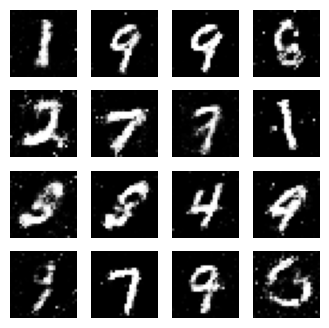

1/1 [==============================] - 0s 49ms/step
10/10 [D loss: 0.6039, acc.: 71.88%] [G loss: 0.8829]
1/1 [==============================] - 0s 37ms/step


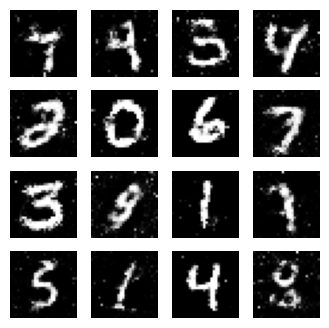

In [6]:
epochs = 10
batch_size = 64
sample_interval = 1  

half_batch = batch_size // 2

for epoch in range(epochs):
    for _ in range(x_train.shape[0] // batch_size):
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        imgs = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.array([1] * batch_size)
        g_loss = combined.train_on_batch(noise, valid_y)
    print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")

    if epoch % sample_interval == 0:
        sample_images(generator, epoch)


VISUALIZATION OF REAL VS GENERATED

1/1 [==============================] - 0s 65ms/step


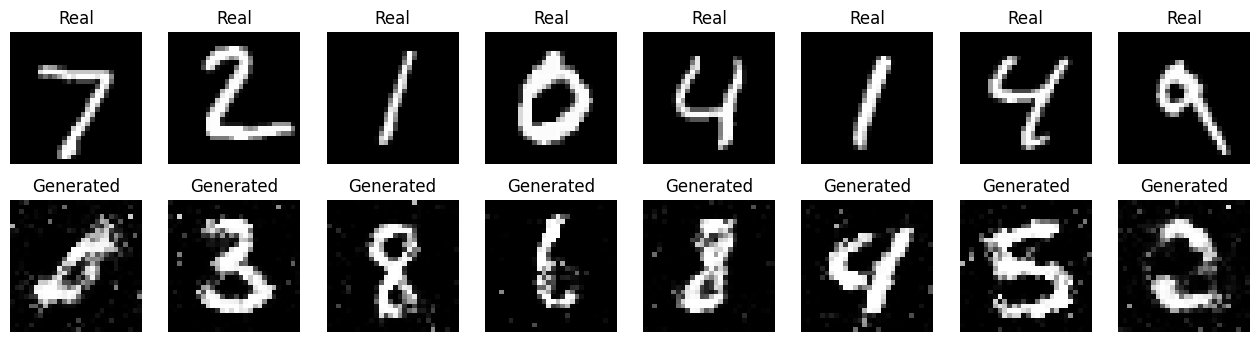

In [7]:
visualize_real_vs_generated_data(x_test, generator, num_images=8)


If the goal is to generate new, realistic images, the GAN with a discriminator accuracy of 71% is more optimal because it focuses on creating high-quality synthetic data.